# Lab 6 - Data Visualization with Seaborn

In [31]:
#reused parameters
team_list = ['Baltimore Ravens', 'Detroit Lions', 'Buffalo Bills',
       'Kansas City Chiefs', 'Philadelphia Eagles', 'Cleveland Browns',
       'Jacksonville Jaguars', 'Miami Dolphins', 'Atlanta Falcons',
       'Cincinnati Bengals', 'Las Vegas Raiders', 'Arizona Cardinals',
       'Carolina Panthers', 'Los Angeles Rams', 'Minnesota Vikings',
       'Los Angeles Chargers', 'Pittsburgh Steelers', 'Chicago Bears',
       'Tampa Bay Buccaneers', 'New Orleans Saints', 'Tennessee Titans',
       'New England Patriots', 'Houston Texans', 'Green Bay Packers',
       'Seattle Seahawks', 'San Francisco 49ers', 'Dallas Cowboys',
       'Denver Broncos', 'Indianapolis Colts']

#Plot label sizes
title_size = 20
label_size = 15

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', None)

## NFL Offense Data

1. Import the NFL week 3-7 data and add a week column to dataset and set the value to the given week (e.g. 3 )for all rows from that week. Combine the weekly dataframes by adding the dataframes together row-wise. Next, merge the division and abbreviation data to this dataframe so that the division and conference info is included (using  team_colors_logos.csv or nfl_teams.csv).

In [33]:
#import
df = pd.read_csv("nfloffenseweek3.csv")
df1 = pd.read_csv("nfloffenseweek4.csv")
df2 = pd.read_csv("nfloffenseweek5.csv")
df3 = pd.read_csv("nfloffenseweek6.csv")
df4 = pd.read_csv("nfloffenseweek7.csv")
nfl_teams_df = pd.read_csv("nfl_teams.csv")

In [34]:
#adding week column
df_week3 = df.assign(week=3)
df_week4 = df1.assign(week=4)
df_week5 = df2.assign(week=5)
df_week6 = df3.assign(week=6)
df_week7 = df4.assign(week=7)

In [35]:
#rename name column for nfl_teams
nfl_teams_renamed_df = nfl_teams_df.rename(columns={'Name': 'team'})

In [36]:
#merging
concat_data = pd.concat([df_week3, df_week4, df_week5, df_week6, df_week7], ignore_index = True)
merged_data = concat_data.merge(nfl_teams_renamed_df)

#Bit of rearranging. Would prefer team information before game information.
merged_data = merged_data[['rank', 'team','ID', 'Abbreviation', 'Conference',
       'Division','games', 'points_scored', 'total_yards',
       'offensive_plays', 'yards_per_play', 'turnovers_lost', 'fumbles_lost',
       '1st_downs', 'passes_completed', 'passes_attempted', 'passing_yards',
       'passing_touchdowns', 'passing_interceptions',
       'net_yards_per_pass_attempt', 'passing_1st_downs', 'rushing_attempts',
       'rushing_yards', 'rushing_touchdowns', 'rushing_yards_per_attempt',
       'rushing_1st_downs', 'penalties', 'penalty_yards', '1st_down_penalties',
       'percentage_scoring_drives', 'percentage_turnover_drives',
       'expected_points', 'week']]

merged_data

,rank,team,ID,Abbreviation,Conference,Division,games,points_scored,total_yards,offensive_plays,yards_per_play,turnovers_lost,fumbles_lost,1st_downs,passes_completed,passes_attempted,passing_yards,passing_touchdowns,passing_interceptions,net_yards_per_pass_attempt,passing_1st_downs,rushing_attempts,rushing_yards,rushing_touchdowns,rushing_yards_per_attempt,rushing_1st_downs,penalties,penalty_yards,1st_down_penalties,percentage_scoring_drives,percentage_turnover_drives,expected_points,week
0,1,Baltimore Ravens,3,BAL,AFC,North,3,99,1141,166,6.9,3,1,55,56,88,735,10,2,7.8,32,72,406,2,5.6,18,8,44,5,42.9,8.6,35.63,3
1,3,Baltimore Ravens,3,BAL,AFC,North,4,119,1437,230,6.2,5,1,77,76,117,869,11,4,7.0,39,105,568,3,5.4,31,17,114,7,42.2,11.1,32.97,4
2,4,Baltimore Ravens,3,BAL,AFC,North,5,138,1762,291,6.1,6,1,99,95,149,1039,12,5,6.6,46,133,723,3,5.4,44,23,162,9,43.6,10.9,36.86,5
3,4,Baltimore Ravens,3,BAL,AFC,North,6,158,2168,349,6.2,8,2,122,112,181,1234,13,6,6.4,59,157,934,4,5.9,54,33,236,9,43.8,12.5,42.86,6
4,3,Baltimore Ravens,3,BAL,AFC,North,7,181,2422,412,5.9,9,3,139,121,197,1328,13,6,6.3,64,201,1094,6,5.4,65,36,289,10,44.6,12.2,44.44,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,32,Indianapolis Colts,14,IND,AFC,South,3,40,994,207,4.8,6,2,61,75,117,681,3,4,5.3,38,78,313,1,4.0,19,16,153,4,22.9,17.1,-22.10,3
141,32,Indianapolis Colts,14,IND,AFC,South,4,57,1359,270,5.0,9,4,82,102,154,1008,5,5,6.0,55,101,351,1,3.5,22,23,203,5,25.0,20.5,-18.74,4
142,32,Indianapolis Colts,14,IND,AFC,South,5,69,1665,343,4.9,11,4,101,128,195,1208,5,7,5.6,69,127,457,1,3.6,26,31,267,6,26.3,19.3,-33.65,5
143,25,Indianapolis Colts,14,IND,AFC,South,6,103,2099,417,5.0,11,4,130,170,253,1597,8,7,5.8,91,143,502,2,3.5,30,38,319,9,31.8,16.7,-11.67,6


In [37]:
merged_data.head()

,rank,team,ID,Abbreviation,Conference,Division,games,points_scored,total_yards,offensive_plays,yards_per_play,turnovers_lost,fumbles_lost,1st_downs,passes_completed,passes_attempted,passing_yards,passing_touchdowns,passing_interceptions,net_yards_per_pass_attempt,passing_1st_downs,rushing_attempts,rushing_yards,rushing_touchdowns,rushing_yards_per_attempt,rushing_1st_downs,penalties,penalty_yards,1st_down_penalties,percentage_scoring_drives,percentage_turnover_drives,expected_points,week
0,1,Baltimore Ravens,3,BAL,AFC,North,3,99,1141,166,6.9,3,1,55,56,88,735,10,2,7.8,32,72,406,2,5.6,18,8,44,5,42.9,8.6,35.63,3
1,3,Baltimore Ravens,3,BAL,AFC,North,4,119,1437,230,6.2,5,1,77,76,117,869,11,4,7.0,39,105,568,3,5.4,31,17,114,7,42.2,11.1,32.97,4
2,4,Baltimore Ravens,3,BAL,AFC,North,5,138,1762,291,6.1,6,1,99,95,149,1039,12,5,6.6,46,133,723,3,5.4,44,23,162,9,43.6,10.9,36.86,5
3,4,Baltimore Ravens,3,BAL,AFC,North,6,158,2168,349,6.2,8,2,122,112,181,1234,13,6,6.4,59,157,934,4,5.9,54,33,236,9,43.8,12.5,42.86,6
4,3,Baltimore Ravens,3,BAL,AFC,North,7,181,2422,412,5.9,9,3,139,121,197,1328,13,6,6.3,64,201,1094,6,5.4,65,36,289,10,44.6,12.2,44.44,7


2. Plot the average number of points scored each week for each team on a horizontal bar chart (with teams on the vertical axis and points on the horizontal axis). Add the points scored for each bar. (Hint: check out `plt.bar_label()`)

In [38]:
team_list
       
x = []
y = []

for name in team_list:
    mask = merged_data["team"] == name

    points_average = (merged_data[mask].points_scored.sum()) / (merged_data[mask].games.sum())

    x.append(name)
    y.append(round(points_average, 2))


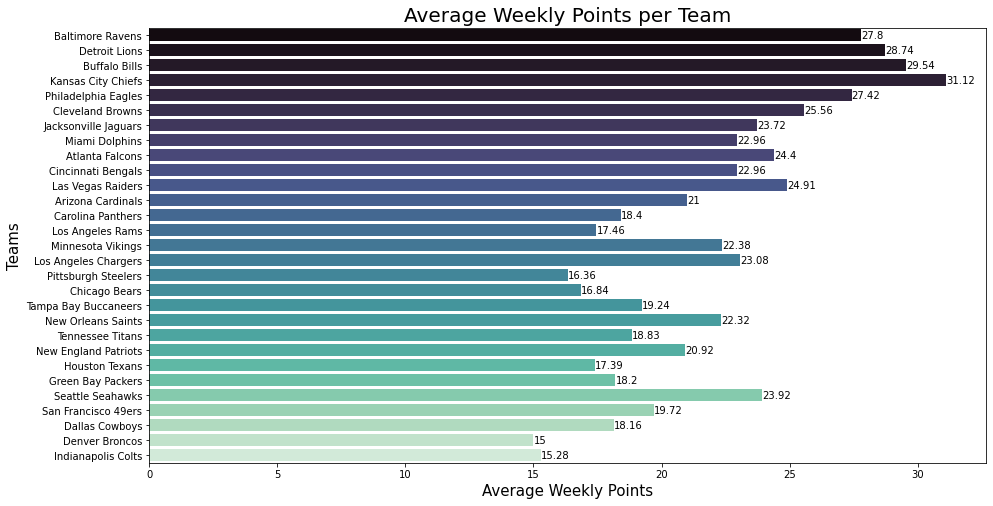

In [39]:
plt.figure(figsize=(15, 8));

plot = sns.barplot(x=y, y=x,
palette='mako')

plot.bar_label(plot.containers[0])
plt.title('Average Weekly Points per Team', fontsize=title_size)
plt.xlabel('Average Weekly Points', fontsize=label_size)
plt.ylabel('Teams', fontsize=label_size);

3. Plot the average passing yards and average rushing yards for each team as a stacked bar chart.

In [40]:
team_list

x = []
y = []
y1 = []

for name in team_list:
    mask = merged_data["team"] == name

    passing_average = merged_data[mask].passing_yards.mean()
    rushing_average = merged_data[mask].rushing_yards.mean()

    x.append(name)
    y.append(passing_average)
    y1.append(rushing_average)

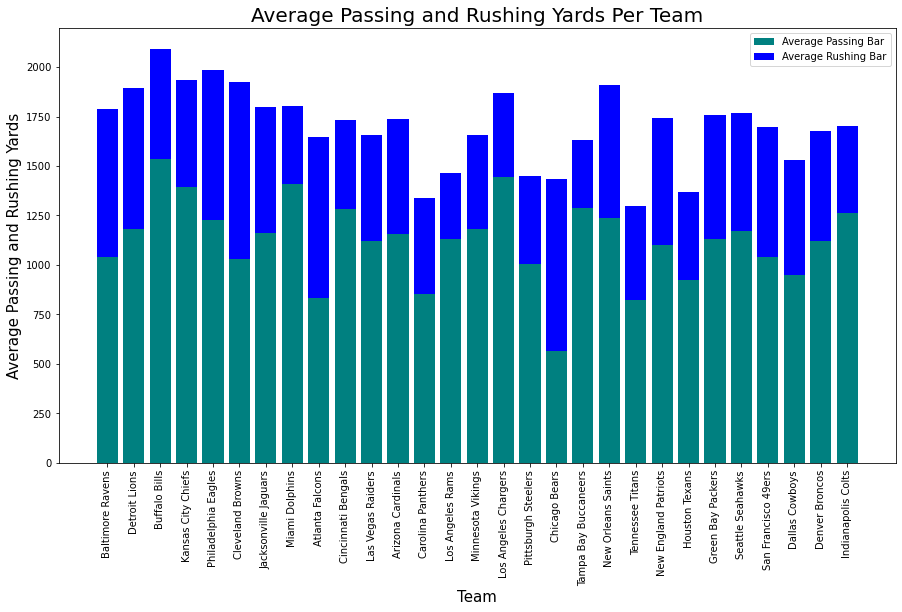

In [41]:
#how to make sns stacked bar charts?

plt.figure(figsize=(15, 8))

average_passing_bar = plt.bar(x, y, color='teal', label="Average Passing Bar")
average_rushing_bar = plt.bar(x, y1, bottom=y, color='blue', label="Average Rushing Bar")
plt.xlabel('Team', fontsize=15)
plt.ylabel('Average Passing and Rushing Yards', fontsize=15)
plt.title('Average Passing and Rushing Yards Per Team', fontsize=20)
plt.xticks(x, rotation='vertical')
plt.legend(loc="upper right");


4. Plot the average total yards vs average first downs for each team on a scatter plot (with first downs on the x axis and total yards on the y axis).

In [42]:
team_list
       
#Get total yard averages and first down averages for each team
x = []
y = []

#rename 1st_down columns
merged_data = merged_data.rename(columns={"1st_downs": "first_downs"})

for name in team_list:
    mask = merged_data["team"] == name

    first_down_average = merged_data[mask].first_downs.mean()
    total_yard_average = merged_data[mask].total_yards.mean()
    

    x.append(first_down_average)
    y.append(total_yard_average)

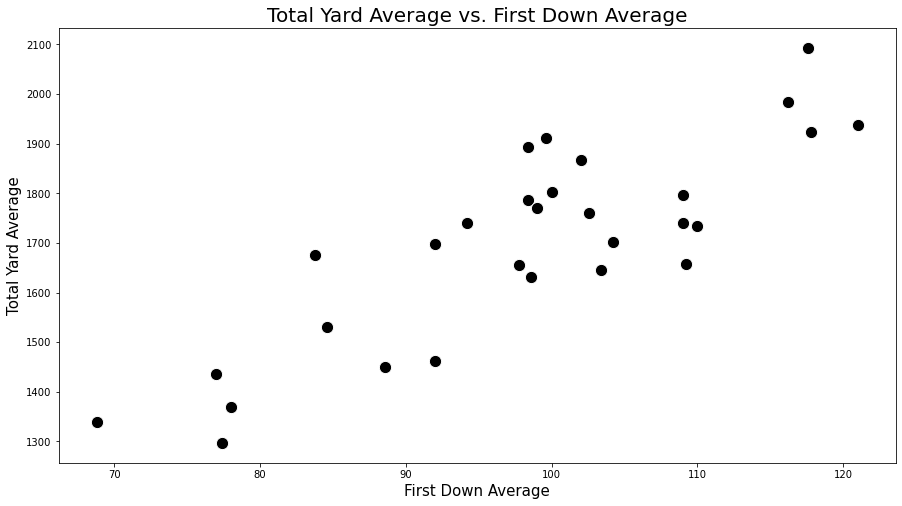

In [43]:
plt.figure(figsize=(15, 8))
plot = sns.scatterplot(x=x ,y=y, s=150, color='black')

plt.xlabel("First Down Average", fontsize=label_size)
plt.ylabel("Total Yard Average", fontsize=label_size)
plt.title("Total Yard Average vs. First Down Average", fontsize=title_size);

5. Plot the penalty yards for the Balitmore Ravens and the LA Rams for each week as a line chart (with week on the x-axis and penalty yards on the y-axis).

In [44]:
mask = merged_data["team"] == "Los Angeles Rams"
merged_data[mask]

,rank,team,ID,Abbreviation,Conference,Division,games,points_scored,total_yards,offensive_plays,yards_per_play,turnovers_lost,fumbles_lost,first_downs,passes_completed,passes_attempted,passing_yards,passing_touchdowns,passing_interceptions,net_yards_per_pass_attempt,passing_1st_downs,rushing_attempts,rushing_yards,rushing_touchdowns,rushing_yards_per_attempt,rushing_1st_downs,penalties,penalty_yards,1st_down_penalties,percentage_scoring_drives,percentage_turnover_drives,expected_points,week
65,15,Los Angeles Rams,29,LAR,NFC,West,3,61,919,175,5.3,7,2,58,74,102,702,4,5,6.3,40,64,217,3,3.4,14,13,126,4,37.9,24.1,3.48,3
66,29,Los Angeles Rams,29,LAR,NFC,West,4,70,1176,248,4.7,9,3,79,106,150,902,4,6,5.4,56,82,274,3,3.3,17,14,131,6,35.9,23.1,-8.08,4
67,29,Los Angeles Rams,29,LAR,NFC,West,5,80,1499,312,4.8,12,5,93,135,194,1187,5,7,5.5,66,97,312,3,3.2,19,17,156,8,31.4,23.5,-19.19,5
68,24,Los Angeles Rams,29,LAR,NFC,West,6,104,1859,375,5.0,13,5,115,161,227,1436,6,8,5.8,82,126,423,5,3.4,24,24,205,9,32.3,21.0,-15.68,6
69,31,Los Angeles Rams,29,LAR,NFC,West,6,104,1859,375,5.0,13,5,115,161,227,1436,6,8,5.8,82,126,423,5,3.4,24,24,205,9,32.3,21.0,-15.68,7


c:\Users\harri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\harri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


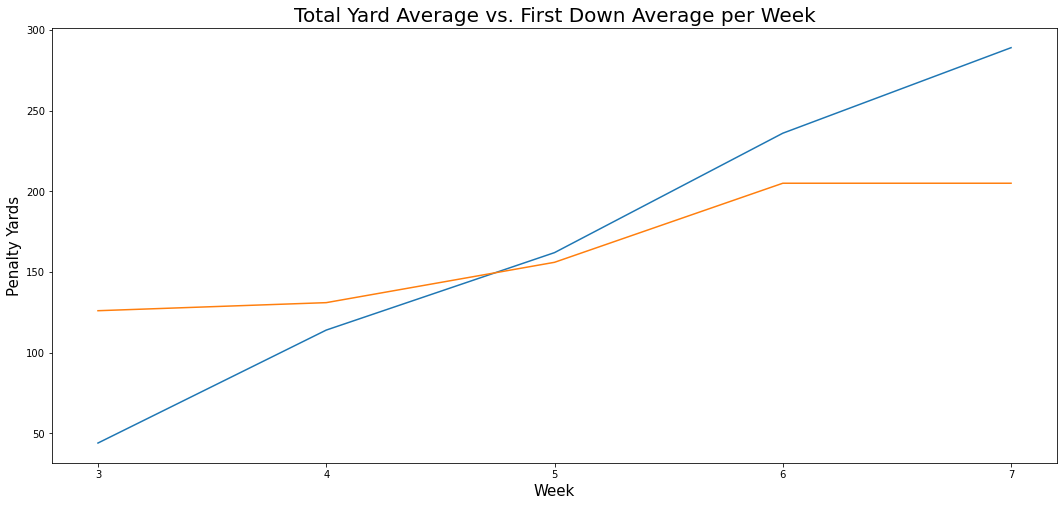

In [45]:
plt.figure(figsize=(18, 8))
#Get total penalty yards and week numbers for each team
baltimore_mask = (merged_data["team"] == "Baltimore Ravens")
la_mask = (merged_data["team"] == "Los Angeles Rams")

x = merged_data.week
y = merged_data[baltimore_mask].penalty_yards
y1 = merged_data[la_mask].penalty_yards

plot = sns.lineplot(x,y)
plot = sns.lineplot(x,y1)

plt.xticks(np.arange(min(x), max(x)+1, 1.0));

plt.xlabel("Week", fontsize=label_size)
plt.ylabel("Penalty Yards", fontsize=label_size)
plt.title("Total Yard Average vs. First Down Average per Week", fontsize=title_size);

6. Plot the average total points vs average yards per play for each team as a scatter plot (with total points on the y-axis and yards per play on the x-axis).

In [46]:
team_list
       
#Get total yard averages and first down averages for each team
x = []
y = []

for name in team_list:
    mask = merged_data["team"] == name

    points_average = (merged_data[mask].points_scored.sum()) / (merged_data[mask].games.sum())
    yardperplay_average = merged_data[mask].yards_per_play.mean()

    x.append(yardperplay_average)
    y.append(points_average)

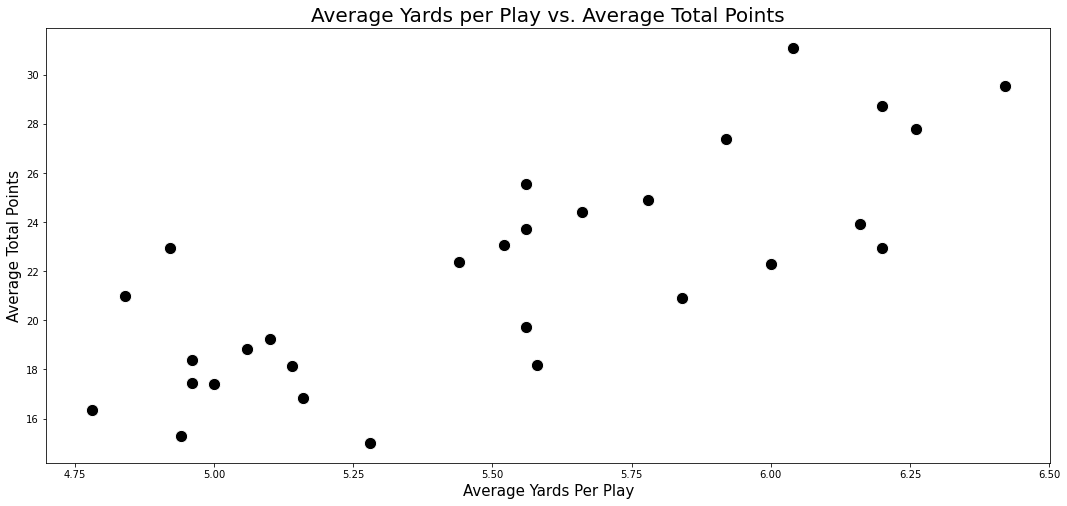

In [47]:
plt.figure(figsize=(18, 8))

plot = sns.scatterplot(x=x, y=y, s=150, color="black")
plt.xlabel('Average Yards Per Play', fontsize=label_size)
plt.ylabel('Average Total Points', fontsize=label_size)
plt.title('Average Yards per Play vs. Average Total Points', fontsize=title_size);


7. Plot the number of penalty yards for each team in the NFC West for each week on bar chart.

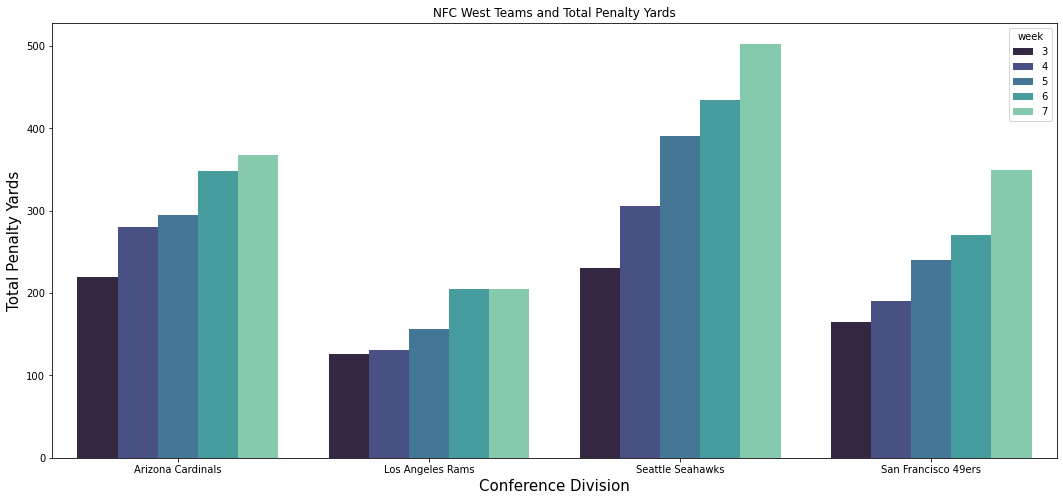

In [48]:
nfc_west_mask = (merged_data["Conference"] == "NFC") & (merged_data["Division"] == "West")
x = merged_data[nfc_west_mask].team
y = merged_data[nfc_west_mask].penalty_yards

plt.figure(figsize=(18, 8))

plot = sns.barplot(x=x, y=y,
data=merged_data,
hue='week',
palette='mako').set(title='NFC West Teams and Total Penalty Yards');
plt.xlabel('Conference Division', fontsize=label_size)
plt.ylabel('Total Penalty Yards', fontsize=label_size);



8. Plot the average number of weekly points per (conference and division) on a horizontal bar chart. (There will be 8 bars.)

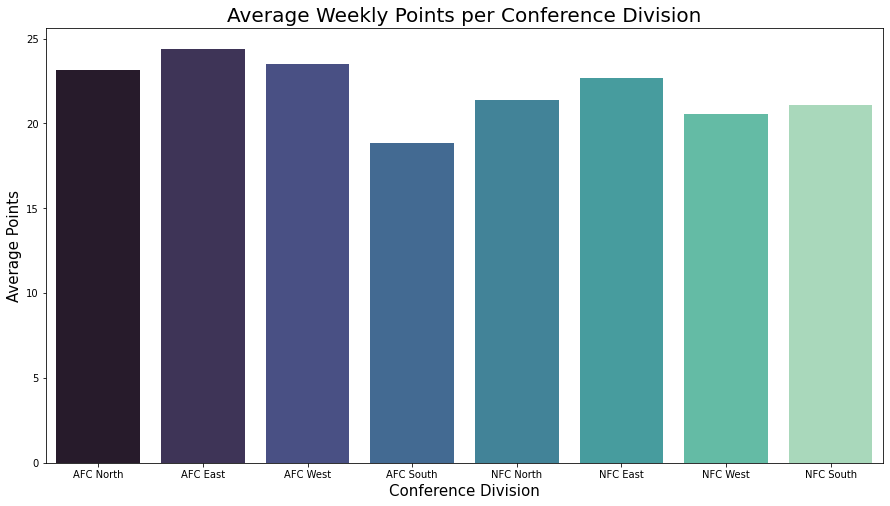

In [49]:
plt.figure(figsize=(15, 8))

conference_list = ['AFC', 'NFC']
division_list = ['North', 'East', 'West', 'South']

x = []
y = []

for conf in conference_list:
    for div in division_list:
        mask = (merged_data["Conference"] == conf) & (merged_data["Division"] == div)
        average_number_points = (merged_data[mask].points_scored.sum()) / (merged_data[mask].games.sum())
        x.append(f'{conf} {div}')
        y.append(average_number_points)

sns.barplot(x=x,y=y, palette="mako")
plt.xlabel('Conference Division', fontsize=label_size)
plt.ylabel('Average Points', fontsize=label_size)
plt.title("Average Weekly Points per Conference Division", fontsize=title_size);